In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import pickle
import warnings
warnings.filterwarnings('ignore')

import re
from tqdm import tqdm

import random
# from pre_processing import load_df_and_features, load_data

In [3]:
import glob
path='drive/MyDrive/Milestone2/'
feature_files = glob.glob(path+"WikiLarge_Train_*2.csv")
features = []
for f in feature_files:
    temp = pd.read_csv(f, index_col=0)
    features.append(temp)
feature_df = pd.concat(features, axis=1)
feature_df = feature_df.fillna(feature_df.mean())

df = pd.read_csv(path+'WikiLarge_Train.csv')
feature_df = pd.concat([df, feature_df], axis=1)
chosen_features = ['aoa', 'concrete_score','verb2', 'conc_unknown', 'aoa_perc_known_lem',
        'conc_total', 'syllable_per_word', 'conc_mean_score','dale_chall_score', 'conc_subtlex_score']
chosen_cols = ['original_text', 'label']+chosen_features
feature_df = feature_df[chosen_cols]

In [4]:
feature_df.shape

(416768, 12)

### Consider whether to scale the features

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [6]:
from sklearn.model_selection import train_test_split

df = feature_df.sample(100000, random_state=42)
X = df[chosen_features].to_numpy()
y = df['label']

X_scaled = sc.fit_transform(X)

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, y, test_size=0.2, random_state=42)
Train_X_scaled, Test_X_scaled, Train_Y_scaled, Test_Y_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MLP

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(150), random_state=1, max_iter=300).fit(Train_X_scaled, Train_Y_scaled)
mlp_predict = mlp.predict(Test_X_scaled)
mlp_acc = accuracy_score(Test_Y_scaled, mlp_predict)*100
mlp_f1 = f1_score(Test_Y_scaled, mlp_predict)*100
mlp_acc, mlp_f1

(67.18499999999999, 68.27476192778073)

In [16]:
mlp.score(Train_X_scaled, Train_Y_scaled)

0.6819875

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score

mlp2 = MLPClassifier(hidden_layer_sizes=(150), random_state=1, max_iter=300).fit(Train_X, Train_Y)
mlp_predict2 = mlp2.predict(Test_X)
mlp_acc2 = accuracy_score(Test_Y, mlp_predict2)*100
mlp_f12 = f1_score(Test_Y, mlp_predict2)*100
mlp_acc2, mlp_f12

(61.27, 68.15490873211643)

In [12]:
import pickle
from sklearn.metrics import f1_score, accuracy_score

# pickle.dump(mlp, open('drive/MyDrive/Milestone2/trained_models/mlp_11simplefeat_10w.pkl','wb'))
reloaded_mlp = pickle.load(open('drive/MyDrive/Milestone2/trained_models/mlp_11simplefeat_10w.pkl','rb'))
mlp_predict = reloaded_mlp.predict(Test_X_scaled)
mlp_acc = accuracy_score(Test_Y, mlp_predict)*100
mlp_f1 = f1_score(Test_Y, mlp_predict)*100
mlp_acc, mlp_f1

(67.18499999999999, 68.27476192778073)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

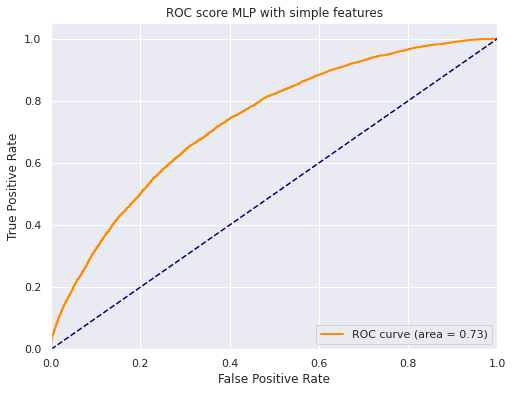

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_score = reloaded_mlp.predict_proba(Test_X_scaled)
mlp_fpr, mlp_tpr, thresholds = roc_curve(Test_Y, y_score[:,1], pos_label=1)
area = auc(mlp_fpr, mlp_tpr)

plt.figure(figsize=(8,6))
lw = 2
plt.plot(mlp_fpr, mlp_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC score MLP with simple features')
plt.legend(loc="lower right")
plt.savefig('ROC_MLP_simplefeats.jpg')

# SVM - skip running with large dataset

In [ ]:
# # https://ai.stackexchange.com/questions/7202/why-does-training-an-svm-take-so-long-how-can-i-speed-it-up
# # svm is slow with large data

# df_svm = df.sample(10000, random_state=42)
# X = df_svm[num_features].to_numpy()
# y = df_svm['label']

# Train_X, Test_X, Train_Y, Test_Y = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
# from sklearn import svm

# SVM = svm.SVC(C=0.5, kernel='linear', degree=3, gamma='auto')
# SVM.fit(Train_X, Train_Y)
# predictions_SVM = SVM.predict(Test_X)

In [ ]:
# from sklearn.metrics import f1_score, accuracy_score

# acc = accuracy_score(predictions_SVM, Test_Y)*100
# f1 = f1_score(predictions_SVM, Test_Y)*100
# acc, f1

In [ ]:
# import pickle

# pickle.dump(SVM, open('drive/MyDrive/Milestone2/trained_models/svm_11simplefeat_small.pkl', 'wb'))
# reloaded_svm = pickle.load(open('drive/MyDrive/Milestone2/trained_models/svm_6simplefeat.pkl', 'rb'))
# predictions_SVM = reloaded_svm.predict(Test_X)
# accuracy_score(predictions_SVM, Test_Y)*100, f1_score(predictions_SVM, Test_Y)*100

# Random Forest

### Does not require feature scaling

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(bootstrap= True,
 max_depth=70,
 max_features='auto',
 min_samples_leaf=4,
 min_samples_split=10,
 n_estimators=800)

rf.fit(Train_X, Train_Y)
rf_preds = rf.predict(Test_X)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score

rf_acc = accuracy_score(Test_Y, rf_preds)*100
rf_f1 = f1_score(Test_Y, rf_preds)*100
rf_acc, rf_f1

(68.965, 70.10547608727063)

In [ ]:
pickle.dump(rf, open('drive/MyDrive/Milestone2/trained_models/rf_11simplefeat_10w.pkl', 'wb'))

In [7]:
rf = pickle.load(open('drive/MyDrive/Milestone2/trained_models/rf_11simplefeat_10w.pkl', 'rb'))

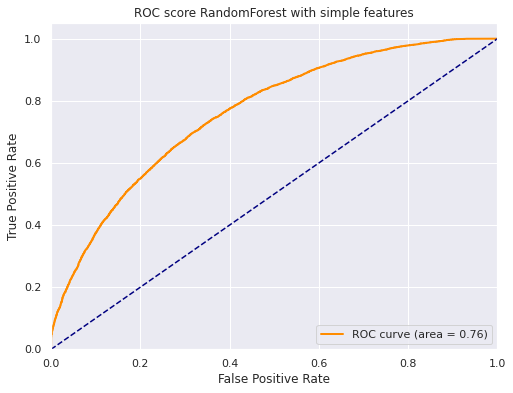

In [8]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_score = rf.predict_proba(Test_X)
rf_fpr, rf_tpr, thresholds = roc_curve(Test_Y, y_score[:,1], pos_label=1)
area = auc(rf_fpr, rf_tpr)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

plt.figure(figsize=(8,6))
lw = 2
plt.plot(rf_fpr, rf_tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC score RandomForest with simple features')
plt.legend(loc="lower right")
plt.savefig('ROC_RandomForest_simplefeats.jpg')

In [10]:
roc_df = pd.DataFrame([rf_fpr, rf_tpr]).T
roc_df.columns = ['rf_fpr', 'rf_tpr']
roc_df['feat'] = 'simplefeat'
roc_df.to_csv('roc_simple_100k.csv')

In [ ]:
score_df = pd.DataFrame([[mlp_acc, rf_acc],[mlp_f1, rf_f1]]).T
score_df.columns=['accuracy', 'f1 score']
score_df['model'] = ['MLP','RandomForest']
score_df.to_csv('scores_10w_simplefeats.csv')

In [ ]:
score_df

,accuracy,f1 score,model
0,67.185,68.274762,MLP
1,68.965,70.105476,RandomForest
